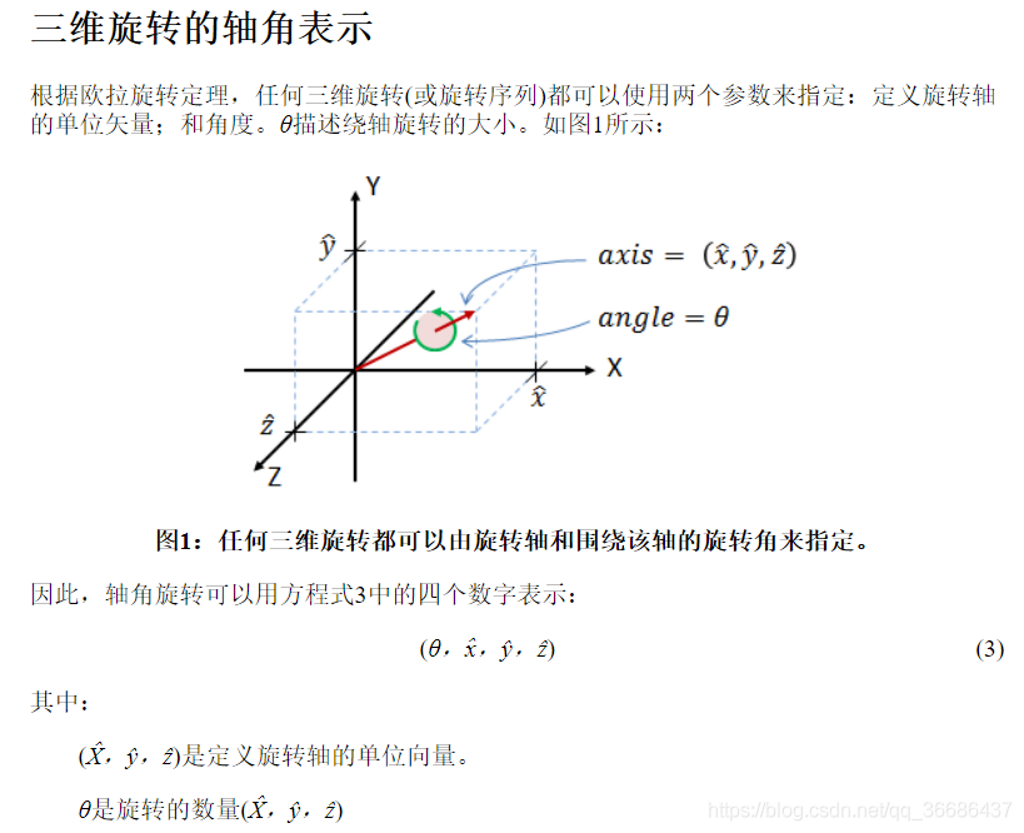
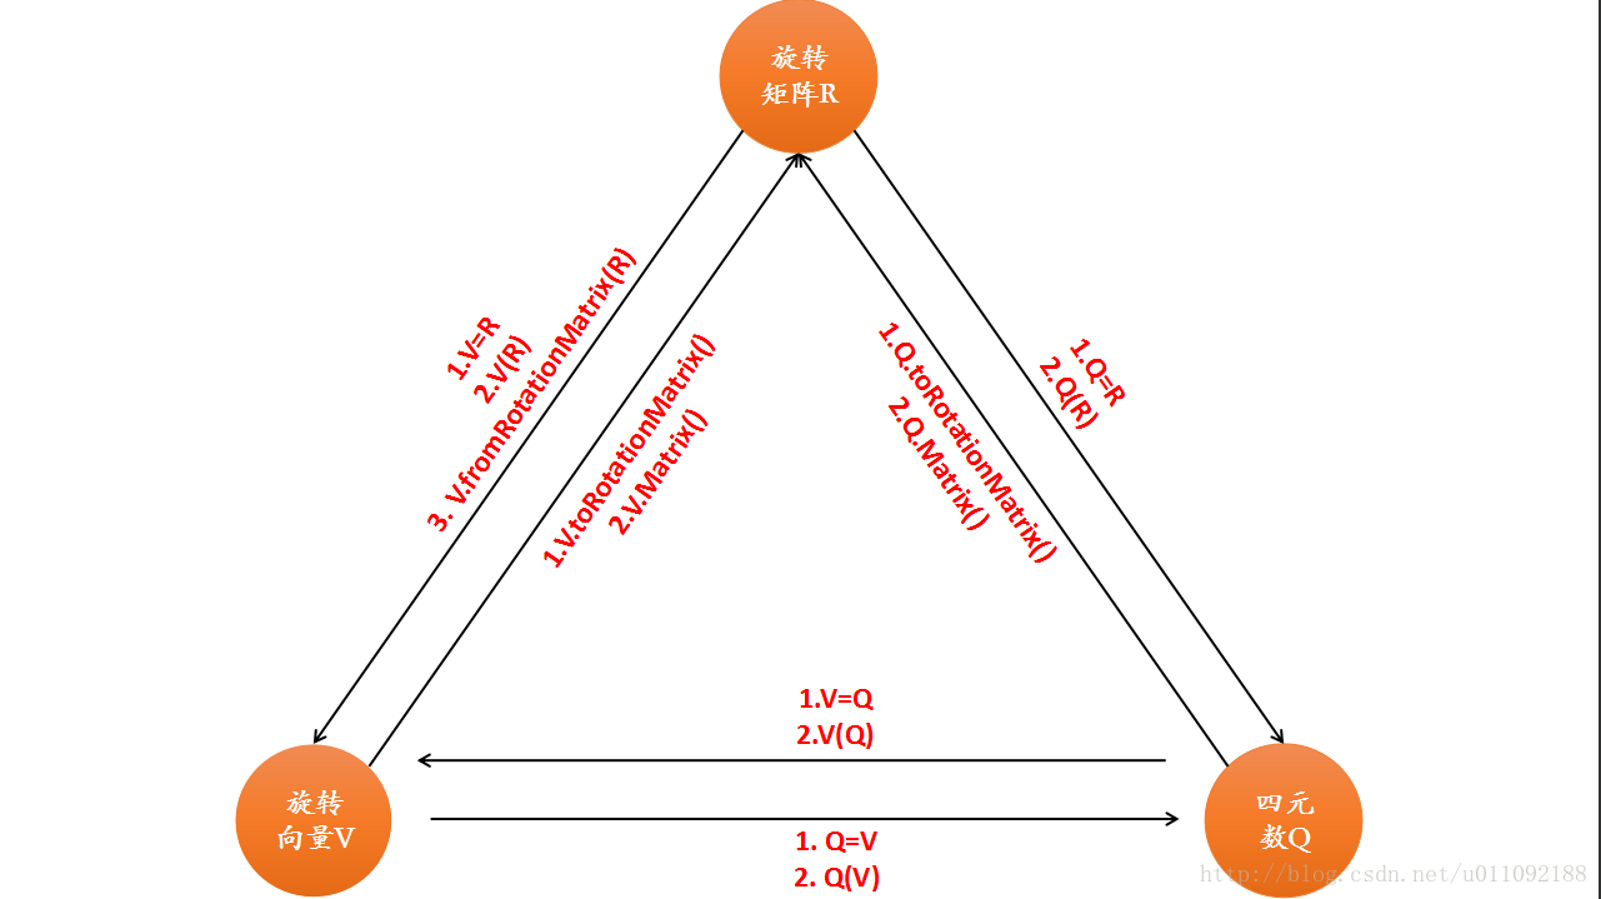
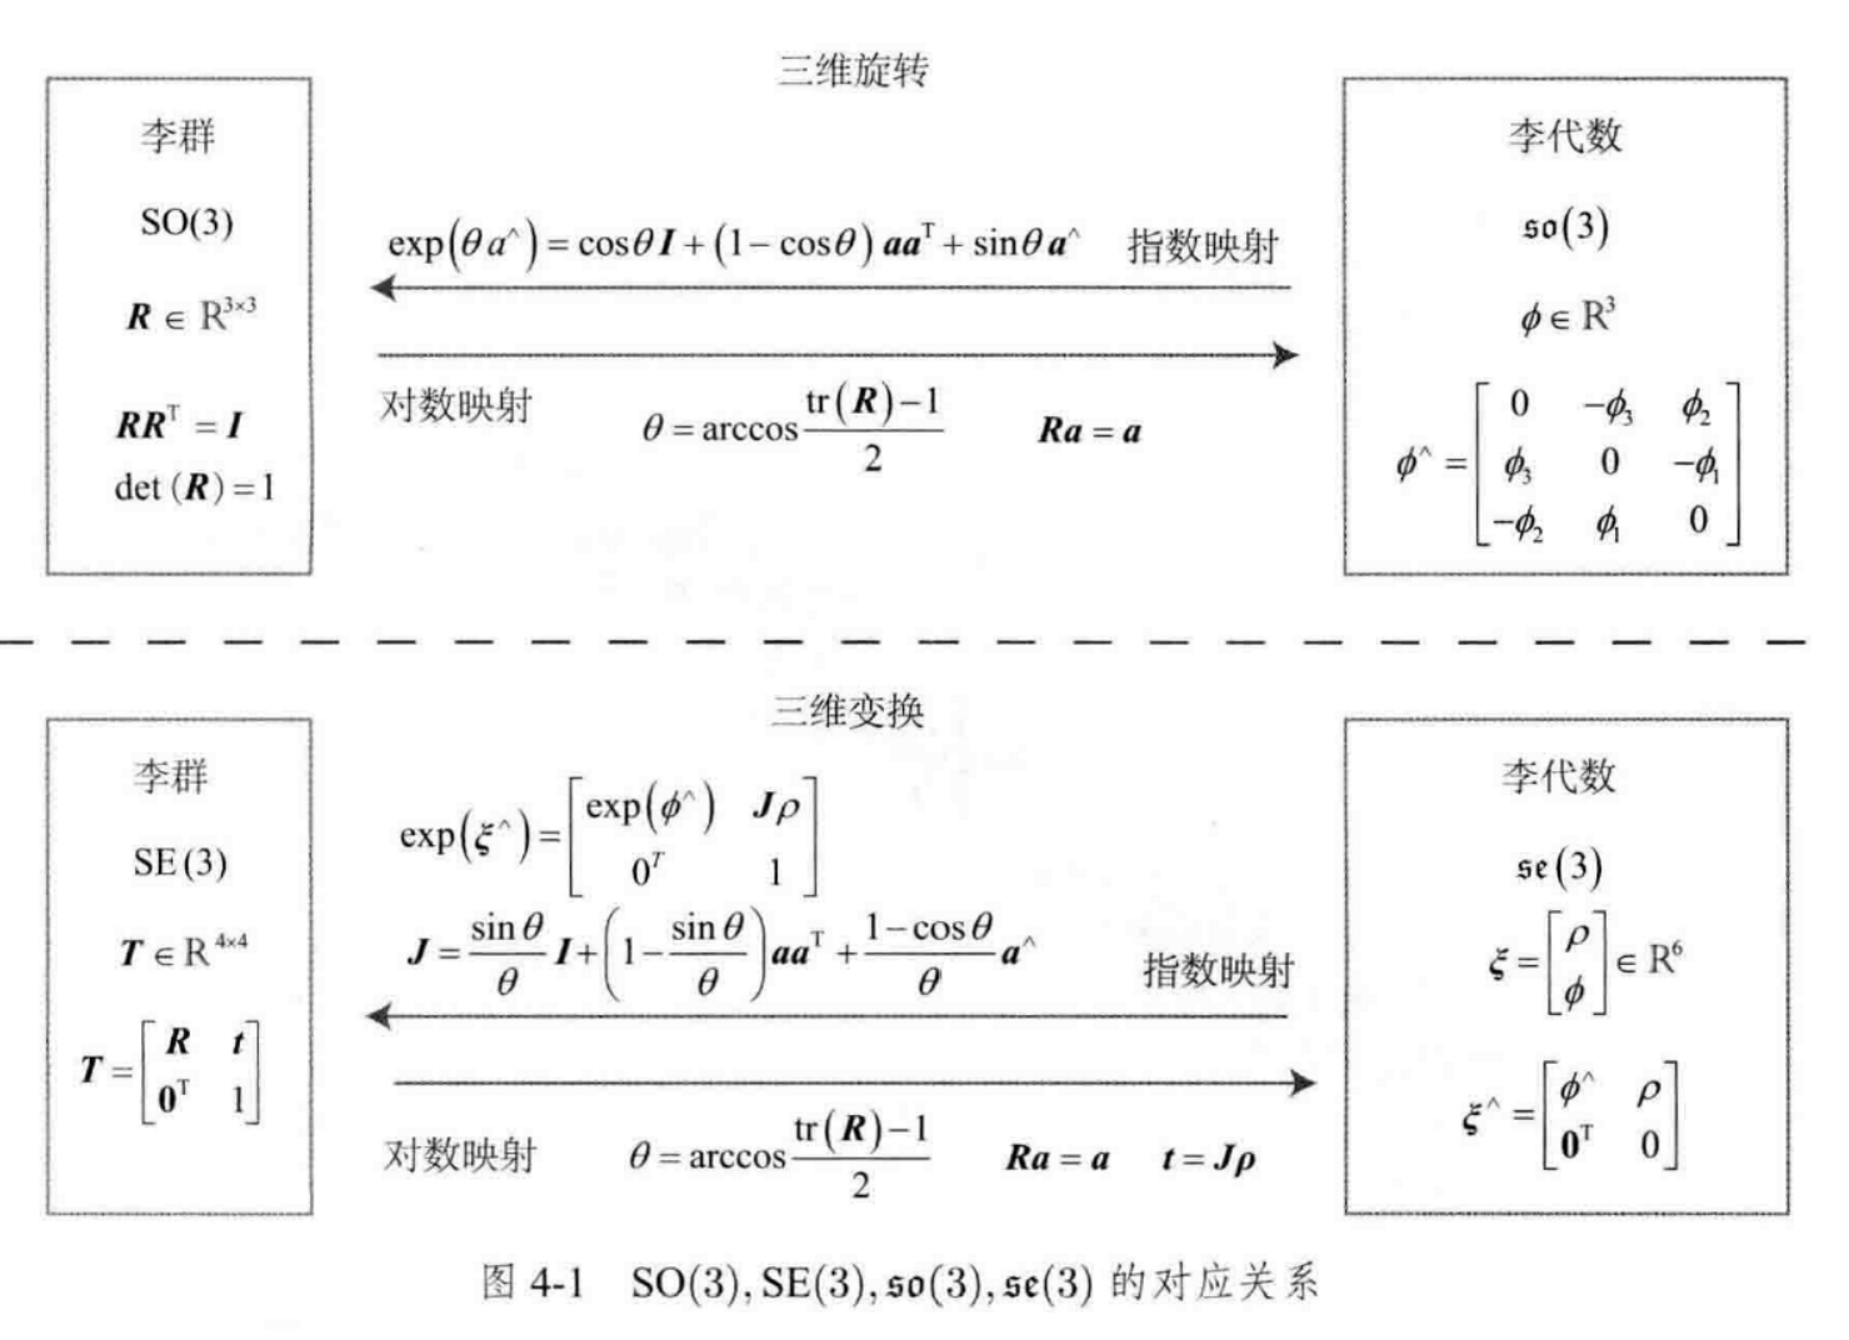
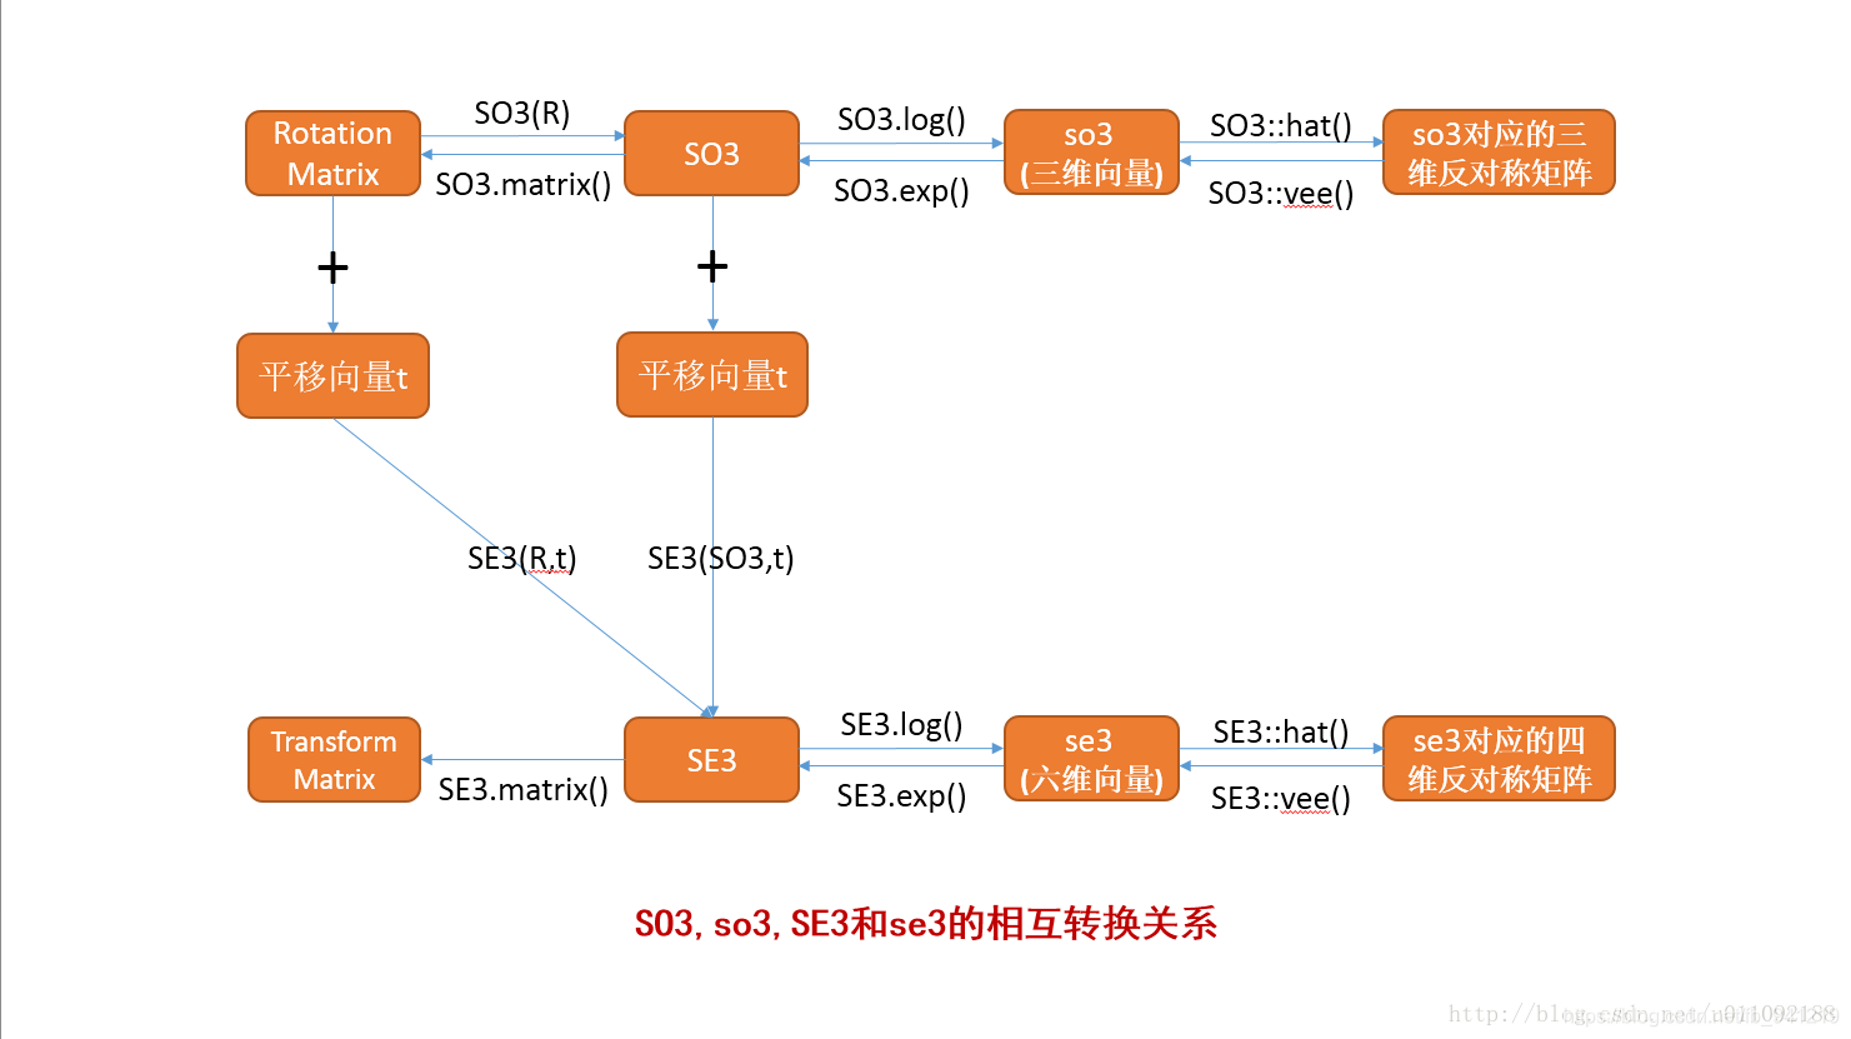

# 旋转+平移
$p_w = R_{wb} ∗ p_b + t_{wb}$  

$p_w$ - 三维坐标 in world frame

$p_b$ - 三维坐标 in body frame  

$R_{wb}$ - 旋转 from body frame to world frame  

$t_{wb}$ - 平移, the position of the origin of body frame in the frame of reference world (body frame 的原点 在 world frame中的坐标)，也就是world frame原点 指向 body frame 原点（在world frame坐标系中的三维坐标）的向量

$p_b = R_{wb}^{−1} \cdot p_w − R_{wb}^{−1} \cdot t_{wb}$

$p_b = R_{bw} \cdot p_w + t_{bw}$

$t_{bw} = −R_{wb}^{−1} \cdot t_{wb}$

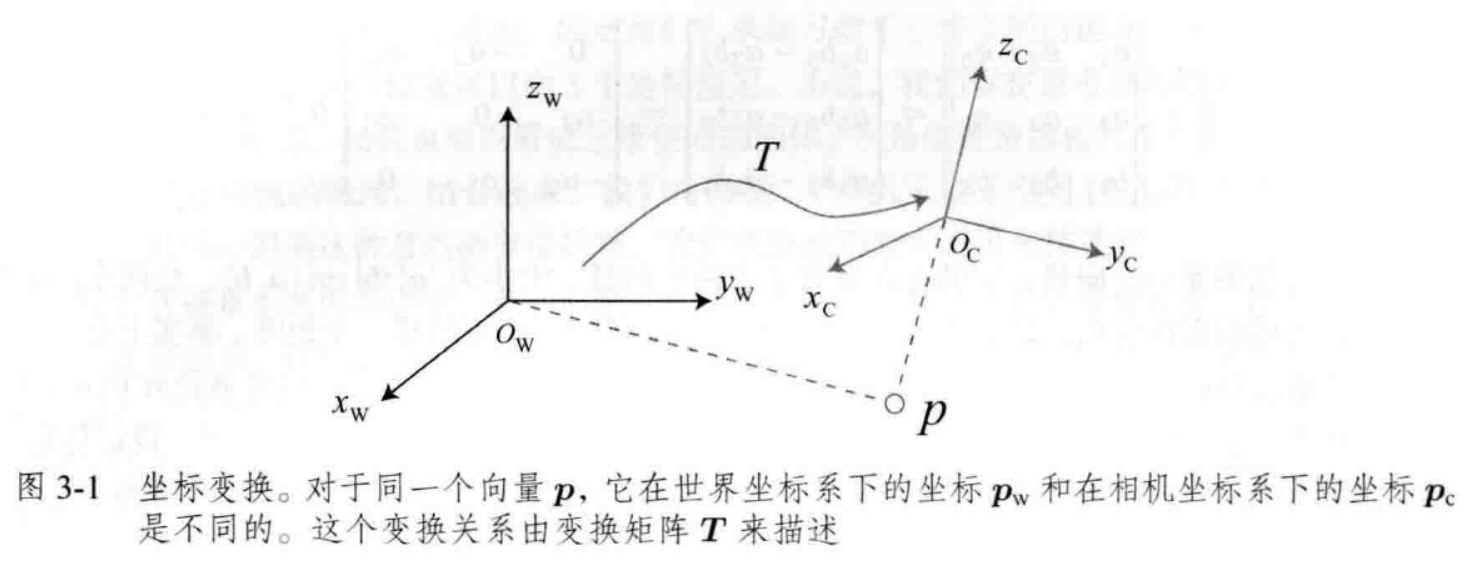

# 旋转矩阵 
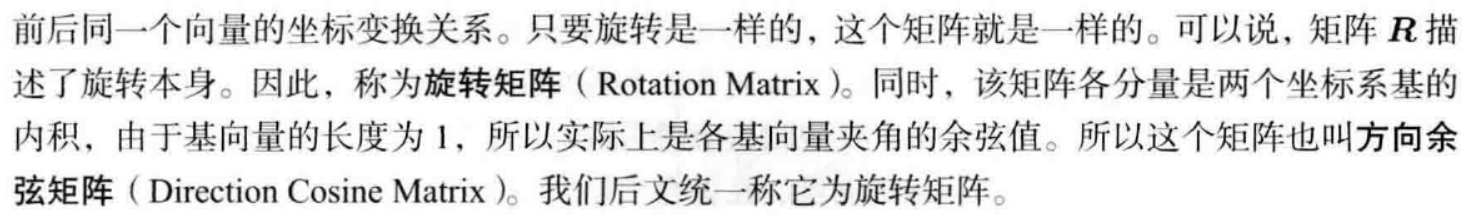


# 旋转矩阵 -> 变换矩阵
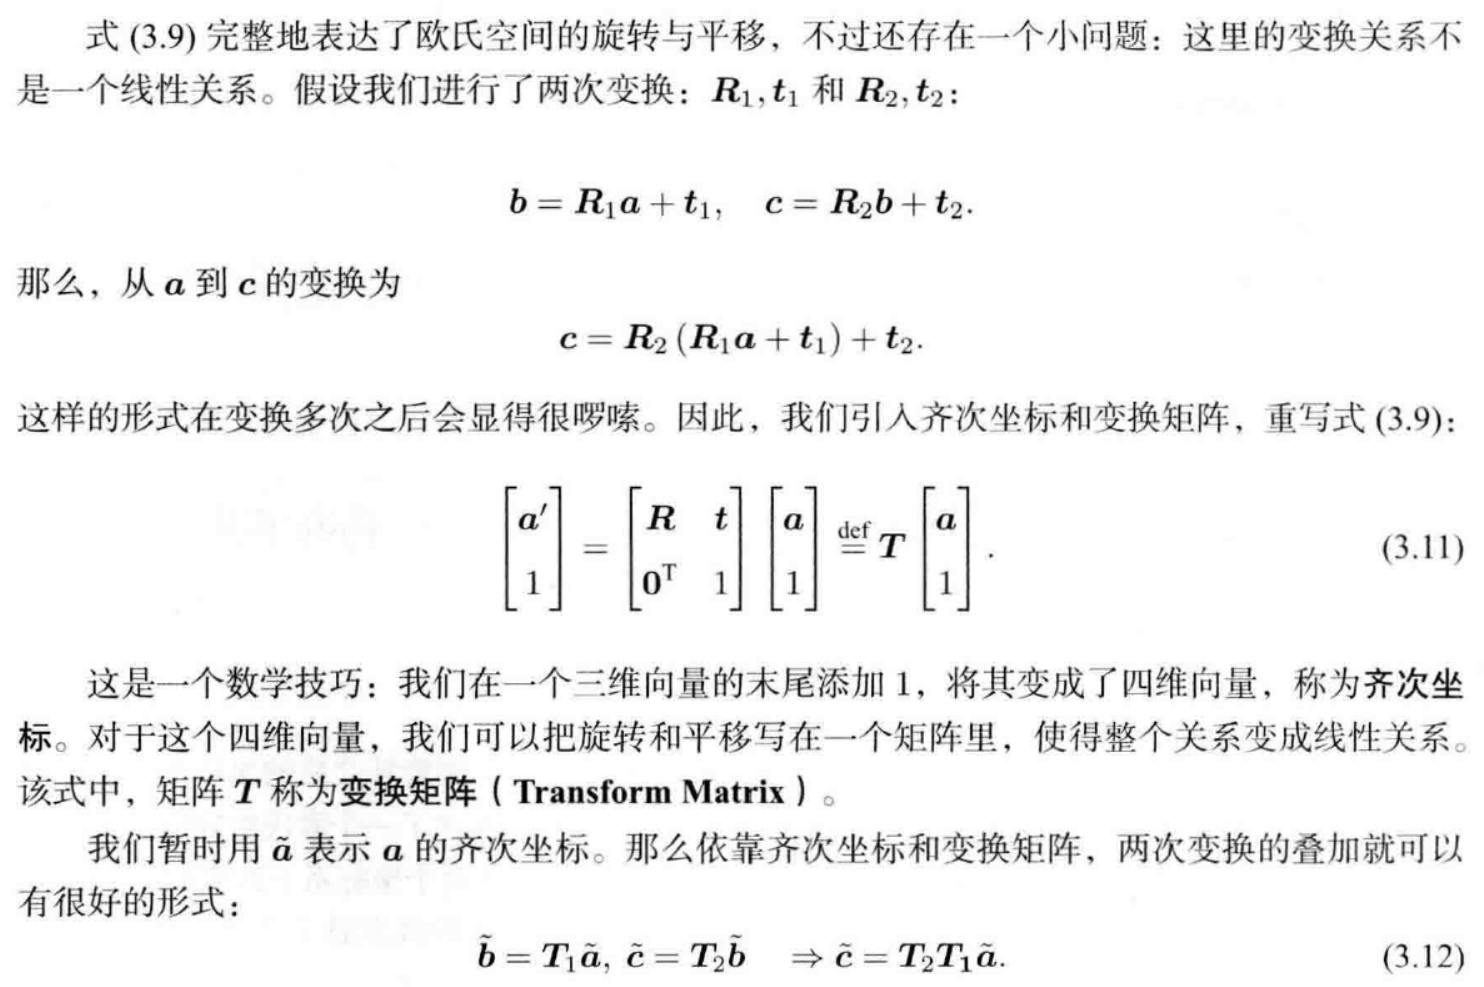
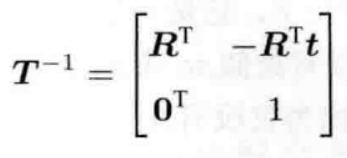

# 旋转矩阵 -> 旋转向量
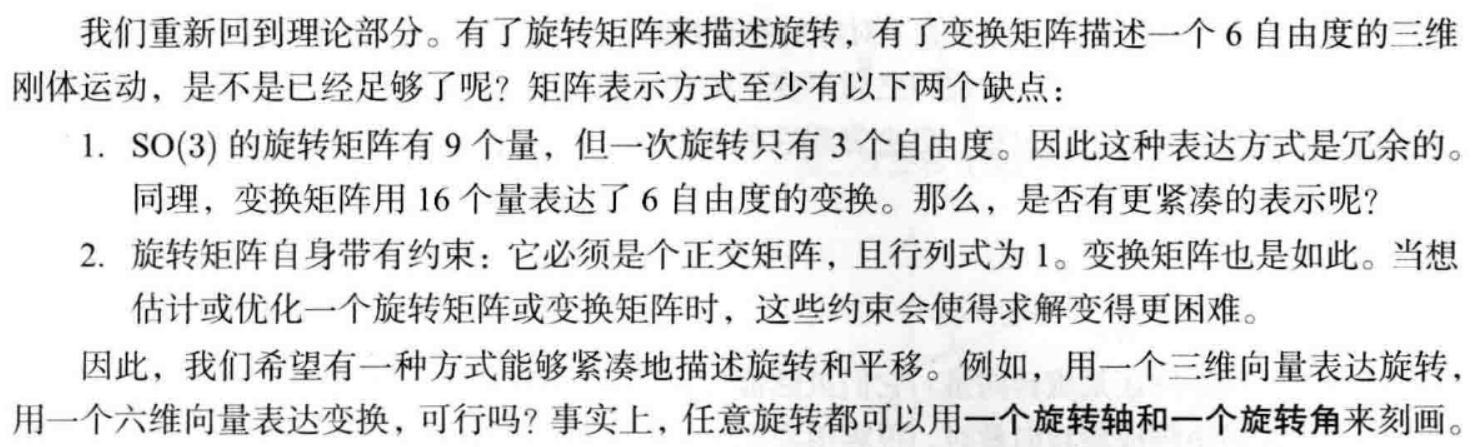

# 旋转向量 -> 四元数
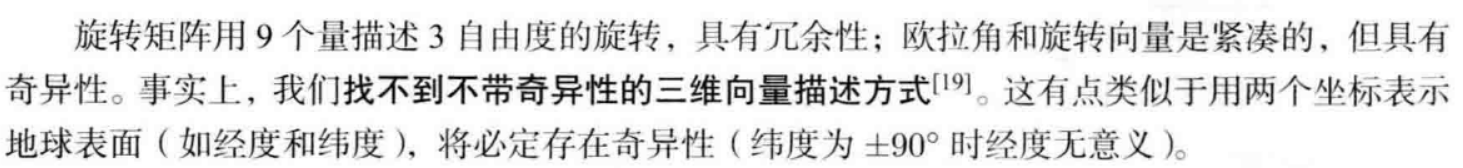

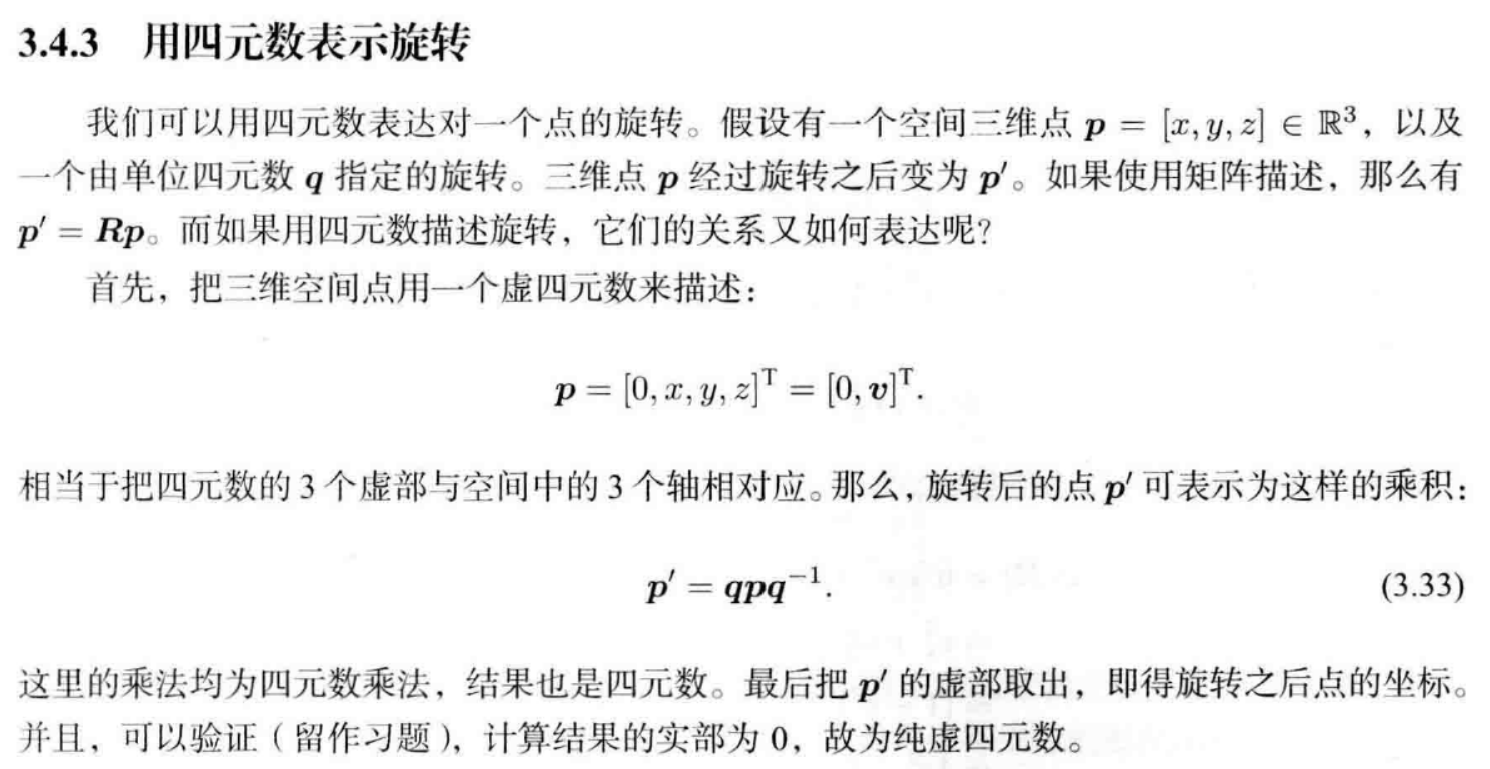

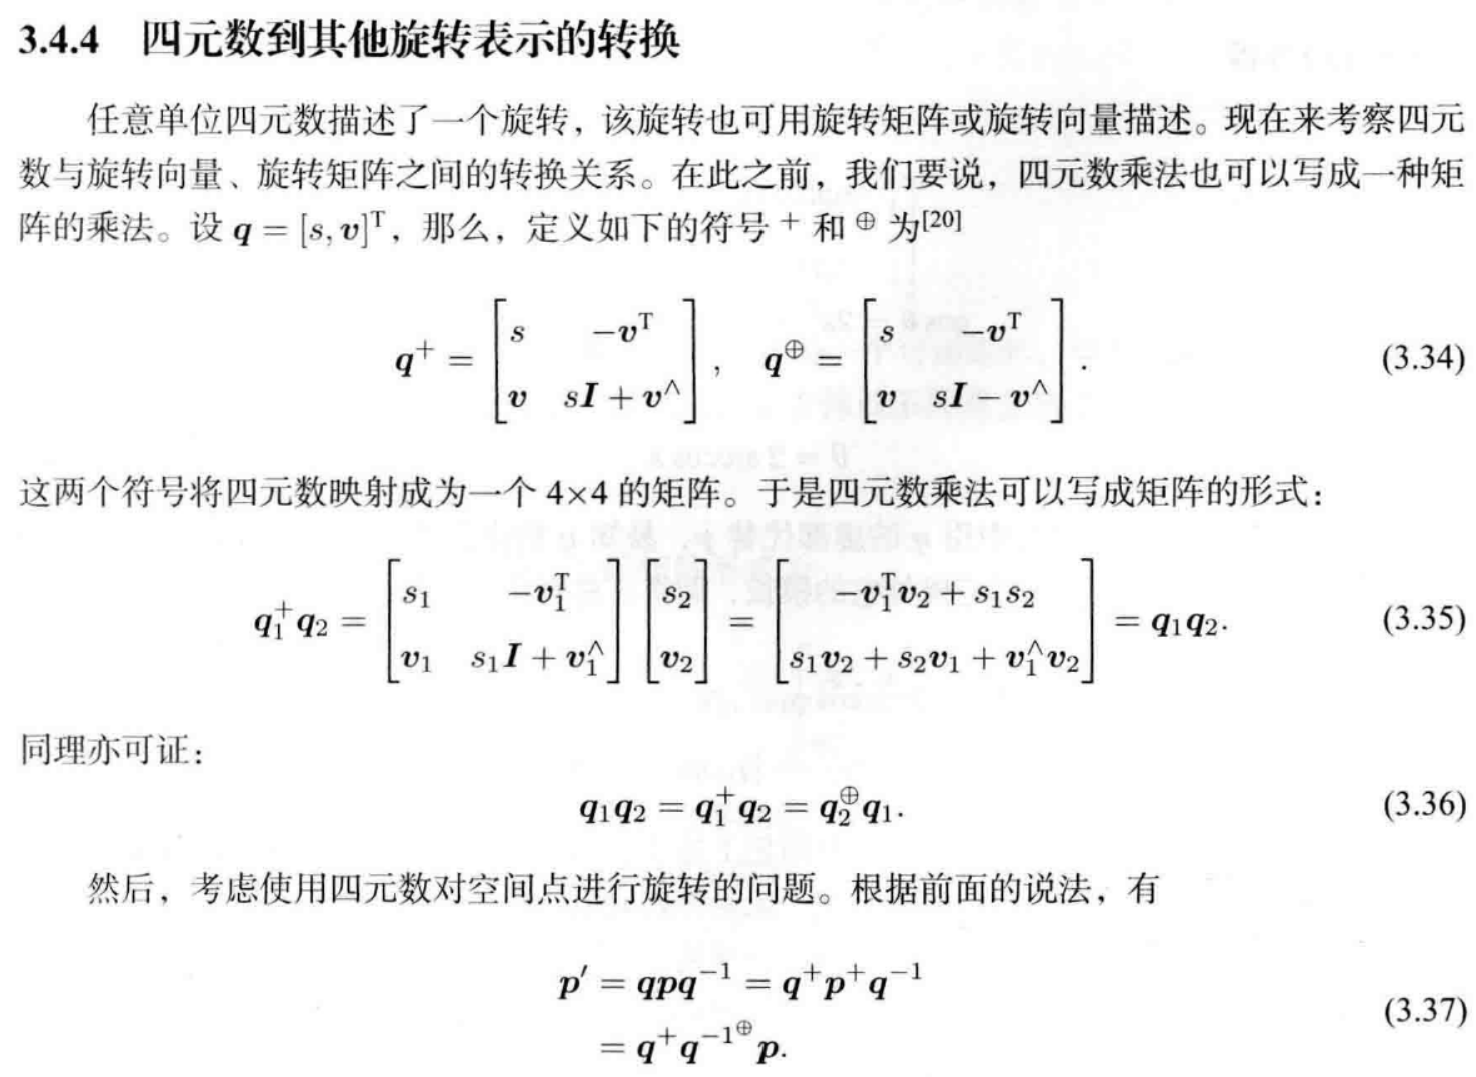

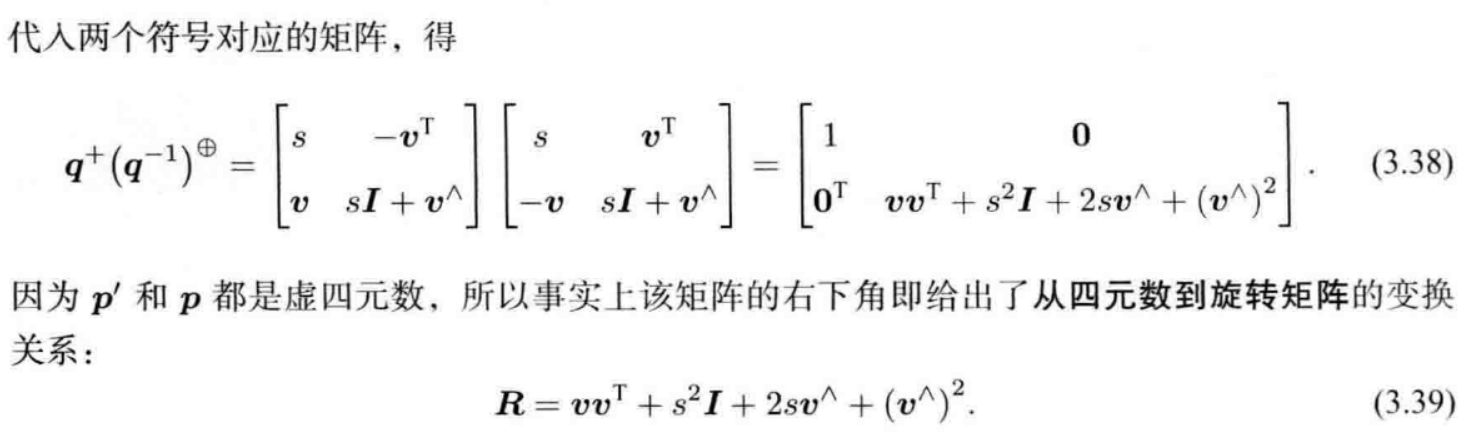

In [ ]:
#include <iostream>
#pragma cling add_include_path("/usr/include/eigen3")
#include<Eigen/Core>     // Eigen 核心部分
#include<Eigen/Dense>    // 稠密矩阵的代数运算（逆，特征值等）
#include<Eigen/Geometry> //几何模块（旋转、平移等）

In [ ]:
cout << "=================== Chapter 3 旋转+平移 ===================" << endl;
// 第三章
cout.precision(4); //保留四位小数

// 旋转向量、旋转矩阵、四元数
double theta = M_PI / 4; //旋转角
Vector3d rotation_axis(0, 0, 1); // 旋转轴(x,y,z)

// 0.1.声明
Matrix3d rotation_matrix1; // 通过 Eigen::Matrix3d, Eigen::Matrix<double, 3, 3>, Eigen::Matrix3f, Eigen::Matrix<float, 3, 3> 声明旋转矩阵
AngleAxisd rotation_vector0; // 通过 Eigen::AngleAxisd 声明旋转向量/欧拉角
Quaterniond quaternion1; // 通过 Eigen::Quaterniond 声明四元数

// 0.2.实例化
// 通过依次输入旋转角和旋转轴给旋转向量赋值
AngleAxisd rotation_vector1(theta, rotation_axis); // 以Z轴(0,0,1)为轴逆时针旋转45度
cout << "旋转向量 旋转角 弧度 = " << rotation_vector1.angle() << "; 旋转角 度 = " << rotation_vector1.angle() * 180 / M_PI << "; axis = " << rotation_vector1.axis().transpose() << endl;

rotation_matrix1 = rotation_vector1.matrix(); // 将旋转向量赋值给四元数，用于后续测试
cout << "旋转矩阵:\n" << rotation_matrix1 << endl;
//旋转矩阵是正交矩阵 => 旋转矩阵的逆 = 旋转矩阵的转置
cout << "旋转矩阵的逆:\n" << rotation_matrix1.inverse() << endl;
cout << "旋转矩阵的转置:\n" << rotation_matrix1.transpose() << endl;
//注意rotation_matrix1.inverse() == rotation_matrix1.transpose()会返回 False，计算时可能存在很小的误差，不能用直接相等来判断
cout << "旋转矩阵的行列式" << rotation_matrix1.determinant() << endl; //旋转矩阵的行列式一定为1，模长不一定为1

// 直接输入给四元数赋值：按输入顺序，依次给四元数的实部w, 虚部x, 虚部y, 虚部z 赋值
Quaterniond quaternion0(1, 2, 3, 4);
cout << "四元数 = " << quaternion0 << endl;
cout << "其虚部x, 虚部y, 虚部z, 实部w依次为:" << quaternion0.coeffs().transpose() << endl;
cout << "虚部 x = " << quaternion0.x() << "; 虚部 y = " << quaternion0.y() << "; 虚部 z = " << quaternion0.z() << "; 实部 w = " << quaternion0.w() << endl;
// 通过向量给四元数赋值：按照向量的顺序，依次为四元数的虚部x, 虚部y, 虚部z, 实部w (即coeffs()的顺序)赋值
Vector4d vector_double_row4_col1_0;
vector_double_row4_col1_0 << 2, 3, 4, 1;
cout << "vector = " << vector_double_row4_col1_0.transpose() << "; 通过vector给四元数赋值得到:" << Quaterniond(vector_double_row4_col1_0) << endl;
// 小结：按 A -> B -> C -> D 顺序直接输入四元数 得到：Bi + Cj + Dk + A，四元数coeffs的顺序为B -> C -> D -> A
//       按 A -> B -> C -> D 顺序直接输入向量，然后通过向量给四元数赋值，得到：Ai + Bj + Ck + D，四元数coeffs的顺序为A -> B -> C -> D
quaternion1 = Quaterniond(rotation_vector1); // 将旋转向量赋值给四元数，用于后续测试

// 通过旋转向量给旋转矩阵赋值
Matrix3d rotation_matrix2(rotation_vector1);
cout << "旋转矩阵 =\n" << rotation_matrix2 << endl;
//通过四元数给旋转矩阵赋值
Matrix3d rotation_matrix3(quaternion1);
cout << "旋转矩阵 =\n" << rotation_matrix2 << endl;

// 通过旋转矩阵给旋转向量赋值
AngleAxisd rotation_vector2(rotation_matrix1);
cout << "旋转向量 angle = " << rotation_vector2.angle() << "; axis = " << rotation_vector2.axis().transpose() << endl;
// 通过四元数给旋转向量赋值
AngleAxisd rotation_vector3(quaternion1);
cout << "旋转向量 angle = " << rotation_vector3.angle() << "; axis = " << rotation_vector3.axis().transpose() << endl;

// 通过旋转矩阵给四元数赋值
Quaterniond quaternion2(rotation_matrix1);
cout << "四元数" << quaternion2 << endl;
// 通过旋转向量给四元数赋值
Quaterniond quaternion3(rotation_vector1);
cout << "四元数" << quaternion3 << endl;
// 通过旋转角和旋转轴（单位向量）给四元数赋值
Quaterniond quaternion4( cos(theta/2), rotation_axis[0]*sin(theta/2), rotation_axis[1]*sin(theta/2), rotation_axis[2]*sin(theta/2) );
cout << "四元数" << quaternion4 << endl;


cout << "\n---- 1. 旋转矩阵、旋转向量、四元数、欧拉角、变换矩阵 ----" << endl;
// 1.1.旋转向量 -> 旋转矩阵
rotation_matrix1 = rotation_vector1.matrix();               cout << "1.1.旋转向量 -> 旋转矩阵 rotation_matrix1 =\n" << rotation_matrix1 << endl;   
rotation_matrix1 = rotation_vector1.toRotationMatrix();     cout << "1.1.旋转向量 -> 旋转矩阵 rotation_matrix1 =\n" << rotation_matrix1 << endl;
// 1.2.四元数 -> 旋转矩阵
rotation_matrix1 = quaternion1.matrix();                    cout << "1.2.四元数 -> 旋转矩阵 rotation_matrix1 =\n" << rotation_matrix1 << endl;
rotation_matrix1 = quaternion1.toRotationMatrix();          cout << "1.2.四元数 -> 旋转矩阵 rotation_matrix1 =\n" << rotation_matrix1 << endl;
// 1.3.旋转矩阵 -> 旋转向量
rotation_vector1 = rotation_matrix1;                        cout << "1.3.旋转矩阵 -> 旋转向量 angle = " << rotation_vector1.angle() << "; axis = " << rotation_vector1.axis().transpose() << endl;
rotation_vector1 = AngleAxisd(rotation_matrix1);            cout << "1.3.旋转矩阵 -> 旋转向量 angle = " << rotation_vector1.angle() << "; axis = " << rotation_vector1.axis().transpose() << endl;
rotation_vector1.fromRotationMatrix(rotation_matrix1);      cout << "1.3.旋转矩阵 -> 旋转向量 angle = " << rotation_vector1.angle() << "; axis = " << rotation_vector1.axis().transpose() << endl;
// 1.4.旋转矩阵->四元数
quaternion1 = rotation_matrix1;                             cout << "1.4.旋转矩阵 -> 四元数 quaternion1 = " << quaternion1 << endl;
quaternion1 = Quaterniond(rotation_matrix1);                cout << "1.4.旋转矩阵 -> 四元数 quaternion1 = " << quaternion1 << endl;
// 1.5.四元数 -> 旋转向量
rotation_vector1 = quaternion1;                             cout << "1.5.四元数 -> 旋转向量 angle = " << rotation_vector1.angle() << "; axis = " << rotation_vector1.axis().transpose() << endl;
rotation_vector1 = AngleAxisd(quaternion1);                 cout << "1.5.四元数 -> 旋转向量 angle = " << rotation_vector1.angle() << "; axis = " << rotation_vector1.axis().transpose() << endl;
// 1.6.旋转向量 -> 四元数
quaternion1 = rotation_vector1;                             cout << "1.6.旋转向量 -> 四元数 quaternion1 = " << quaternion1 << endl;
quaternion1 = Quaterniond(rotation_vector1);                cout << "1.6.旋转向量 -> 四元数 quaternion1 = " << quaternion1 << endl;
cout << "1.小结：在已声明好变量的前提下，旋转向量或四元数->旋转矩阵 用.matrix()，其他情况用 = 即可\n" << endl;

// 1.7.旋转矩阵 -> 欧拉角
Vector3d euler_angle = rotation_matrix1.eulerAngles(2, 1, 0); // 2,1,0表示按Z-Y-X的先后顺序，即roll-pitch-yaw的先后顺序
cout << "1.7.旋转矩阵 -> 欧拉角 yaw pitch roll =" << euler_angle.transpose() << endl; //输出按照X-Y-Z的顺序

// 1.8.欧拉角 -> 旋转矩阵、旋转向量、四元数
AngleAxisd rollAngle(AngleAxisd(euler_angle(2), Vector3d::UnitX()));
AngleAxisd pitchAngle(AngleAxisd(euler_angle(1), Vector3d::UnitY()));
AngleAxisd yawAngle(AngleAxisd(euler_angle(0), Vector3d::UnitZ()));
rotation_matrix1 = yawAngle * pitchAngle * rollAngle;
cout << "1.8.欧拉角 -> 旋转矩阵\n" << rotation_matrix1 << endl;
rotation_vector1 = yawAngle * pitchAngle * rollAngle;
cout << "1.8.欧拉角 -> 旋转向量 angle = " << rotation_vector1.angle() << "; axis = " << rotation_vector1.axis().transpose() << endl;
quaternion1 = yawAngle * pitchAngle * rollAngle;
cout << "1.8.欧拉角 -> 四元数: " << quaternion1 << endl;

// 1.9.旋转+平移 -> 变换矩阵
Isometry3d transform_matrix;                        // 通过 Eigen::Isometry 声明变换矩阵，Isometry3d虽然记为3d，实质上是4*4的矩阵
transform_matrix = Isometry3d::Identity();          // 初始化为单位矩阵，必须步骤，否则结果不对，原因未知
//transform_matrix.rotate(rotation_matrix1);        // 变换矩阵的旋转部分，通过旋转矩阵进行旋转
//transform_matrix.rotate(rotation_vector1);        // 变换矩阵的旋转部分，通过旋转向量进行旋转
transform_matrix.rotate(quaternion1);               // 变换矩阵的旋转部分，通过四元数进行旋转
transform_matrix.pretranslate(Vector3d(1, 3, 4));   // 变换矩阵的平移部分，平移向量为(1,3,4)
//注意：若在循环中使用rotate()和pretranslate()，如果每次迭代不重置变换矩阵，transform_matrix会累加，而不是覆盖，未实际测试
cout << "1.9.旋转+平移 -> 变换矩阵 transform_matrix = \n" << transform_matrix.matrix() << endl;
// 注意：transform_matrix 无法直接输出，需要使用transform_matrix.matrix()输出变换矩阵的矩阵值

cout << "---- 2.原坐标/原向量v -> 旋转/平移 -> 新坐标/新向量v_star ----" << endl;
Vector3d vector_double_row3_col1_4(1, 0, 0); //原坐标x,y,z
cout << "vector before rotation : " << vector_double_row3_col1_4.transpose() << endl;
Vector3d vector_double_row3_col1_4_star;

// 2.1.通过旋转矩阵 对坐标/向量进行 旋转
vector_double_row3_col1_4_star = rotation_matrix1 * vector_double_row3_col1_4;
cout << "vector after rotation (by rotation matrix) : " << vector_double_row3_col1_4_star.transpose() << endl;
//vector_double_row3_col1_4_star = rotation_matrix1.inverse() * vector_double_row3_col1_4;
//cout << "vector after rotation (by rotation matrix) : " << vector_double_row3_col1_4_star.transpose() << endl; // 数值不对，待验证!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

// 2.2.通过旋转向量 对坐标/向量进行 旋转
vector_double_row3_col1_4_star = rotation_vector1 * vector_double_row3_col1_4;
cout << "vector after rotation (by rotation vector/angle axis) : " << vector_double_row3_col1_4_star.transpose() << endl;

// 2.3.通过四元数 对坐标/向量进行 旋转1
vector_double_row3_col1_4_star = quaternion1 * vector_double_row3_col1_4; // 使用重载的乘法，即四元数 右乘 向量，
cout << "vector after rotation (by quaternion) : " << vector_double_row3_col1_4_star.transpose() << endl;
// 2.3.通过四元数 对坐标/向量进行 旋转2
Vector4d vector_double_row4_col1_1;
vector_double_row4_col1_1 << vector_double_row3_col1_4, 0;
//cout << "vector的四元数:" << Quaterniond(vector_double_row4_col1_1) << endl;
/*
// 注意 直接给四元数赋值 和 通过向量给四元数赋值的区别
Vector4d vector_temp;
vector_temp << 0, 1, 0, 0;
cout << "vector = " << vector_temp.transpose() << "\nvector 的四元数:" << Quaterniond(vector_temp) << endl; //四元数:0i + 1j + 0k + 0
vector_temp << 1, 0, 0, 0;
cout << "vector = " << vector_temp.transpose() << "\nvector 的四元数:" << Quaterniond(vector_temp) << endl; //四元数:1i + 0j + 0k + 0
Quaterniond quaternion6(0, 1, 0, 0);
cout << "vector的四元数:" << quaternion6 << endl;                                                           //四元数:1i + 0j + 0k + 0
Quaterniond quaternion7(1, 0, 0, 0);
cout << "vector的四元数:" << quaternion7 << endl;                                                           //四元数:0i + 0j + 0k + 1
*/

Quaterniond quaternion5 = quaternion1 * Quaterniond(vector_double_row4_col1_1) * quaternion1.inverse();
// 新坐标/新向量 = 四元数 * 原坐标/向量的四元数 * 四元数的逆，其中*为四元数乘法运算
// P59公式3.33  q*v*q^{-1}，中间的v应为v的四元数，不是原坐标/向量
// quaternion1, Quaterniond(vector), quaternion1.inverse() 均为四元数，三个四元数做四元数乘法，结果 quaternion5 仍为四元数；
// 由于 quaternion1 是单位四元数，它的逆 quaternion1.inverse() 等于 它的共轭，即实部不变，虚部取负号
cout << "vector after rotation (by quaternion) : " << quaternion5.coeffs().transpose() << endl;

/*
// 由于 quaternion1 是单位四元数，它的逆 quaternion1.inverse() 等于 它的共轭，即实部不变，虚部取负号
if (quaternion1.inverse().x() == -quaternion1.x() && quaternion1.inverse().y() == -quaternion1.y() && quaternion1.inverse().z() == -quaternion1.z() && quaternion1.inverse().w() == quaternion1.w()) {
    cout << "quaternion1 的逆 = quaternion1 的共轭" << endl;
    cout << "quaternion1 = " << quaternion1 << endl;
    cout << "quaternion1.inverse() = " << quaternion1.inverse() << endl;
}
*/

// 2.4.通过变换矩阵 对坐标/向量进行 旋转+平移
vector_double_row3_col1_4_star = transform_matrix * vector_double_row3_col1_4; // 相当于 旋转矩阵 * v1 + 平移向量
cout << "vector after transform (by transform matrix) : " << vector_double_row3_col1_4_star.transpose() << endl;

//通过 Eigen::Affine3d 声明仿射变换; 通过 Eigen::Projective3d 声明射影变换


cout << "---- 3.原坐标/原向量 coordinate in robot1 -> 位姿 -> 新坐标/新向量coordinate in robot2 ----" << endl;
// 已知 一个点 在robot1坐标系下的坐标coordinate_in_robot1，及坐标系robot1的位姿和robot2的位姿(robot1坐标系的位姿 包括 世界坐标系到robot1坐标系的旋转 + 世界坐标系到robot1坐标系的平移)
// 求解 该点在robot2坐标系下的坐标coordinate_in_robot2
// P64-P65的例子
Quaterniond quaternion_world_to_robot1(0.35, 0.2, 0.3, 0.1), quaternion_world_to_robot2(-0.5, 0.4, -0.1, 0.2); //世界坐标系到robot1坐标系和robot2坐标系的旋转(用四元数表示旋转)
if (quaternion_world_to_robot1.norm() != 1) {
    quaternion_world_to_robot1.normalize(); //四元数单位化，必要步骤，否则会影响最终结果
}
if (quaternion_world_to_robot2.norm() != 1) {
    quaternion_world_to_robot2.normalize();
}
Vector3d t_world_to_robot1(0.3, 0.1, 0.1), t_world_to_robot2(-0.1, 0.5, 0.3); //世界坐标系到robot1坐标系和robot2坐标系的平移
Vector3d coordinate_in_robot1(0.5, 0, 0.2); //在robot1坐标系下的坐标coordinate_in_robot1
cout << "coordinate in robot1: " << coordinate_in_robot1.transpose() << endl;

// 通过旋转+平移构建变换矩阵
Isometry3d transform_matrix_world_to_robot1;
transform_matrix_world_to_robot1 = Isometry3d::Identity();
transform_matrix_world_to_robot1.rotate(quaternion_world_to_robot1);
transform_matrix_world_to_robot1.pretranslate(t_world_to_robot1);

Isometry3d transform_matrix_world_to_robot2(quaternion_world_to_robot2);
/* <=>
Isometry3d transform_matrix_world_to_robot2;
transform_matrix_world_to_robot2 = Isometry3d::Identity();
transform_matrix_world_to_robot2.rotate(quaternion_world_to_robot2);
*/
transform_matrix_world_to_robot2.pretranslate(t_world_to_robot2);

// 坐标变换推到过程 coordinate_in_robot1 = transform_matrix_world_to_robot1 * coordinate_in_world
//               => coordinate_in_world = transform_matrix_world_to_robot1的逆 * coordinate_in_robot1
//                  coordinate_in_robot2 = transform_matrix_world_to_robot2 * coordinate_in_world
//                                       = transform_matrix_world_to_robot2 * transform_matrix_world_to_robot1的逆 * coordinate_in_robot1
Vector3d coordinate_in_world = transform_matrix_world_to_robot1.inverse() * coordinate_in_robot1;
cout << "coordinate in world: " << coordinate_in_world.transpose() << endl;
Vector3d coordinate_in_robot2 = transform_matrix_world_to_robot2 * transform_matrix_world_to_robot1.inverse() * coordinate_in_robot1;
cout << "coordinate in robot2: " << coordinate_in_robot2.transpose() << endl;


cout << "=================== Chapter 4 旋转求导 ===================" << endl;
//第四章
cout << "---- Eigen 旋转矩阵/旋转向量/四元数 相互计算 ----" << endl;
double theta6 = M_PI / 6;
Eigen::Vector3d rotation_axis6(1/sqrt(6), 1/ sqrt(3), 1/sqrt(2));
Eigen::AngleAxisd rotation_vector6(theta6, rotation_axis6); // 旋转向量
Eigen::Matrix3d rotation_matrix6 = rotation_vector6.matrix(); // 旋转矩阵
Eigen::Quaterniond quaternion6(rotation_matrix6); //四元数

cout << "旋转向量 旋转角 弧度 = " << rotation_vector6.angle() << "; 旋转角 度 = " << rotation_vector6.angle() * 180 / M_PI << "; axis = " << rotation_vector6.axis().transpose() << endl;
cout << "旋转轴的模长 = " << rotation_axis6.norm() << endl;
cout << "旋转矩阵的行列式 = " << rotation_matrix6.determinant() << ", 模长 = " << rotation_matrix6.norm() << endl; //旋转矩阵的行列式一定为1，模长不一定为1
cout << "四元数的模长 = " << quaternion6.norm() << ", 目标值 = " << sqrt(pow(quaternion6.w(), 2) + pow(quaternion6.x(), 2) + pow(quaternion6.y(), 2) + pow(quaternion6.z(), 2)) << endl;

cout << "旋转矩阵\n" << rotation_matrix6 << endl;
cout << "旋转角增加360°后的旋转矩阵\n" << Eigen::AngleAxisd(theta6 + 2 * M_PI, rotation_axis6).matrix() << endl;
//cout << "单位矩阵数乘" << 5 * Matrix3d::Identity() << endl;
//cout << "向量反对称矩阵 ^ \n" << Skew_symmetric_matrix(rotation_axis6) << endl;
Eigen::Matrix3d rotation_vector6_2 = cos(theta6) * Matrix3d::Identity() + (1 - cos(theta6)) * rotation_axis6 * rotation_axis6.transpose() + sin(theta6) * Skew_symmetric_matrix(rotation_axis6); // P53 公式3.15
cout << "1.根据旋转向量计算旋转矩阵/罗德里格斯公式\n" << rotation_vector6_2 << endl;
Eigen::Vector3d vector6;
vector6 << quaternion6.x(), quaternion6.y(), quaternion6.z();
Eigen::Matrix3d rotation_vector6_3 = vector6 * vector6.transpose() + quaternion6.w() * quaternion6.w() * Matrix3d::Identity() + 2 * quaternion6.w() * Skew_symmetric_matrix(vector6) + Skew_symmetric_matrix(vector6) * Skew_symmetric_matrix(vector6); // P60 公式3.38
cout << "2.根据四元数计算旋转矩阵\n" << rotation_vector6_3 << endl;

double theta6_2 = 2 * acos(quaternion6.w());
cout << "3.根据四元数计算旋转向量" << endl;
cout << "旋转角 = " << theta6_2 << ", 目标值 = " << theta6 << endl;
cout << "旋转轴 x = " << quaternion6.x() / sin(theta6_2 / 2) << ", 目标值 = " << rotation_axis6(0) << endl;
cout << "旋转轴 y = " << quaternion6.y() / sin(theta6_2 / 2) << ", 目标值 = " << rotation_axis6(1) << endl;
cout << "旋转轴 z = " << quaternion6.z() / sin(theta6_2 / 2) << ", 目标值 = " << rotation_axis6(2) << endl;
cout << "4.根据旋转向量计算四元数" << endl;
cout << "四元数 w = " << cos(theta6_2 / 2) << ", 目标值 = " << quaternion6.w() << endl;
cout << "四元数 x = " << rotation_axis6(0) * sin(theta6_2 / 2) << ", 目标值 = " << quaternion6.x() << endl;
cout << "四元数 y = " << rotation_axis6(1) * sin(theta6_2 / 2) << ", 目标值 = " << quaternion6.y() << endl;
cout << "四元数 z = " << rotation_axis6(2) * sin(theta6_2 / 2) << ", 目标值 = " << quaternion6.z() << endl;

cout << "5.根据旋转矩阵计算旋转向量" << endl;
cout << "旋转向量的旋转角" << acos((rotation_matrix6.trace() - 1) / 2) << ", 目标值 = " << theta6 << endl;
// 旋转轴的计算待完善特征值特征向量和解方程组之后再补充 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


cout << "---- Sophus 计算李群/李代数 ----" << endl;
// 1.1.旋转矩阵/四元数 -> 特殊正交群
Sophus::SO3d SO3_special_orthogonal_group1(rotation_matrix6); // 通过 Sophus::SO3d 声明一个特殊正交群
Sophus::SO3d SO3_special_orthogonal_group3(quaternion6);
// 1.2.特殊正交群 -> 旋转矩阵
cout << "SO(3)特殊正交群的数据类型: " << typeid( SO3_special_orthogonal_group1 ).name() << endl;
cout << "rotation matrix -> SO(3)特殊正交群/旋转矩阵:\n" << SO3_special_orthogonal_group1.matrix() << endl; // SO3_special_orthogonal_group1特殊正交群不可直接输出，需要转化成旋转矩阵再输出
cout << "quaternion -> SO(3)特殊正交群/旋转矩阵:\n" << SO3_special_orthogonal_group3.matrix() << endl;

// 1.3.特殊正交群 --(对数映射)--> 李代数的向量
cout << "so(3)李代数的向量的数据类型: " << typeid( SO3_special_orthogonal_group1.log() ).name() << endl;
Sophus::Vector3d so3_Lie_algebra_vector = SO3_special_orthogonal_group1.log(); //对数映射
cout << "SO(3)特殊正交群/旋转矩阵 -> so(3)李代数的向量 = " << so3_Lie_algebra_vector.transpose() << ", 目标向量 = " << (theta6 * rotation_axis6).transpose() << endl;
// 1.4.李代数的向量 -> 特殊正交群
cout << "so(3)李代数的向量 -> SO(3)特殊正交群/旋转矩阵:\n" << Sophus::SO3d::exp(so3_Lie_algebra_vector).matrix() << endl;
// 可用旋转向量 --(罗格里格斯公式)--> 旋转矩阵计算
cout << "旋转角 = " << so3_Lie_algebra_vector.norm() << ", 目标值 = " << theta6 << endl;
cout << "旋转角 = " << (so3_Lie_algebra_vector/so3_Lie_algebra_vector.norm()).transpose() << ", 目标向量 = " << rotation_axis6.transpose() << endl;
Eigen::Vector3d rotation_axis6_4 = so3_Lie_algebra_vector / so3_Lie_algebra_vector.norm(); // 注意：自定义Skew_symmetric_matrix函数的输入类型为Eigen::Vector3d
Eigen::Matrix3d rotation_vector6_4 = cos(so3_Lie_algebra_vector.norm()) * Matrix3d::Identity() + (1 - cos(so3_Lie_algebra_vector.norm())) * rotation_axis6_4 * rotation_axis6_4.transpose() + sin(so3_Lie_algebra_vector.norm()) * Skew_symmetric_matrix(rotation_axis6_4); // P53 公式3.15
cout << "so(3)李代数的向量 -> SO(3)特殊正交群/旋转矩阵:\n" << rotation_vector6_4 << endl;

// 1.5.李代数的向量 <-> 李代数的反对称矩阵
cout << "so(3)李代数的向量的数据类型: " << typeid(so3_Lie_algebra_vector).name() << endl;
cout << "so(3)李代数的反对称矩阵的数据类型: " << typeid(Sophus::SO3d::hat(so3_Lie_algebra_vector)).name() << endl;
Sophus::Matrix3d so3_Lie_algebra_matrxi = Sophus::SO3d::hat(so3_Lie_algebra_vector); // Sophus::SO3d::hat(): 向量->反对称矩阵
cout << "so(3)李代数的向量 -> so(3)李代数的反对称矩阵/hat\n" << so3_Lie_algebra_matrxi << endl;
cout << "so(3)李代数的反对称矩阵/hat -> so(3)李代数的向量 = " << Sophus::SO3d::vee(so3_Lie_algebra_matrxi).transpose() << endl; // Sophus::SO3d::vee(): 反对称矩阵 -> 向量

// 2.1.旋转矩阵/四元数/特殊正交群 + 平移向量 -> 特殊欧式群
Sophus::SE3d SE3_special_euclidean_group1(rotation_matrix6, Vector3d(1, 3, 4)); // 通过 Sophus::SE3d 声明一个特殊欧式群
Sophus::SE3d SE3_special_euclidean_group2(quaternion6, Vector3d(1, 3, 4));
Sophus::SE3d SE3_special_euclidean_group3(SO3_special_orthogonal_group1, Vector3d(1, 3, 4));
// 2.2.特殊欧式群 -> 旋转矩阵
cout << "旋转矩阵 and 平移向量 -> SE(3)特殊欧式群/变换矩阵:\n" << SE3_special_euclidean_group1.matrix() << endl; // SE3_special_euclidean_group1特殊欧式群不可直接输出，需要转化成旋转矩阵再输出
cout << "四元数 and 平移向量 -> SE(3)特殊欧式群/变换矩阵:\n" << SE3_special_euclidean_group2.matrix() << endl;
cout << "特殊正交群 and 平移向量 -> SE(3)特殊欧式群/变换矩阵:\n" << SE3_special_euclidean_group3.matrix() << endl;

// 2.3.特殊欧式群 --(对数映射)--> 李代数的向量
cout << "se(3)李代数的向量的数据类型: " << typeid(SE3_special_euclidean_group1.log()).name() << endl;
Sophus::Vector6d se3_Lie_algebra_vector = SE3_special_euclidean_group1.log(); //对数映射
cout << "SE(3)特殊欧式群/变换矩阵 -> se(3)李代数的向量 = " << se3_Lie_algebra_vector.transpose() << endl;
cout << "se(3)李代数的向量 = 旋转角*旋转轴 = " << (theta6 * rotation_axis6).transpose() << endl;
// 2.4.李代数的向量 -> 特殊欧式群
cout << "==== new ===" << endl;
cout << "s3(3)李代数的向量 -> SE(3)特殊欧式群:\n" << Sophus::SE3d::exp(se3_Lie_algebra_vector).matrix() << endl;
// 验证 t = J * rho, t为旋转矩阵
cout << "se(3)李代数的向量的前3个分量" << se3_Lie_algebra_vector.head(3).transpose() << endl; // 获取向量的前n个元素
cout << "se(3)李代数的向量的后3个分量" << se3_Lie_algebra_vector.tail(3).transpose() << endl; // 获取向量尾部的n个元素
cout << "se(3)李代数的向量的后3个分量" << se3_Lie_algebra_vector.segment(3, 3).transpose() << endl; // 获取从向量的第i个元素开始的n个元素
Eigen::Vector3d rho = se3_Lie_algebra_vector.head(3);
Eigen::Vector3d phi = se3_Lie_algebra_vector.tail(3); // phi = 旋转角*旋转轴
double rotation_angle6_5 = phi.norm(); // 旋转角
Eigen::Vector3d rotation_axis6_5 = phi / phi.norm(); // 旋转轴
Eigen::Matrix3d matrix_jacobi = (sin(rotation_angle6_5)/ rotation_angle6_5) * Matrix3d::Identity()
                              + (1 - sin(rotation_angle6_5) / rotation_angle6_5) * rotation_axis6_5 * rotation_axis6_5.transpose()
                              + ((1-cos(rotation_angle6_5))/ rotation_angle6_5) * Skew_symmetric_matrix(rotation_axis6_5); // P80 公式4.27
cout << "平移向量 matrix_jacobi * rho = " << (matrix_jacobi * rho).transpose() << endl;
cout << "目标向量 = " << Vector3d(1, 3, 4).transpose() << endl;
// 验证 rho = J^{-1} * t
cout << "rho = " << (matrix_jacobi.inverse() * Vector3d(1, 3, 4)).transpose() << endl;
Eigen::Matrix3d matrix_jacobi_inverse = (rotation_angle6_5/2) * tan(M_PI/2 - rotation_angle6_5 / 2) * Matrix3d::Identity()
                                      + (1 - (rotation_angle6_5 / 2) * tan(M_PI / 2 - rotation_angle6_5 / 2)) * rotation_axis6_5 * rotation_axis6_5.transpose()
                                      - (rotation_angle6_5 / 2) * Skew_symmetric_matrix(rotation_axis6_5); //P82 公式4.32
// cot(a) = tan( M_PI/2 - a )
cout << "rho = " << (matrix_jacobi_inverse * Vector3d(1, 3, 4)).transpose() << endl;

// 2.5.李代数的向量 <-> 李代数的反对称矩阵
cout << "se(3)李代数的向量的数据类型: " << typeid(se3_Lie_algebra_vector).name() << endl;
cout << "se(3)李代数的矩阵的数据类型: " << typeid(Sophus::SE3d::hat(se3_Lie_algebra_vector)).name() << endl; // Sophus::SE3d::hat(): 向量->反对称矩阵，注意不是Sophus::SO3d::hat()
Sophus::Matrix4d se3_Lie_algebra_matrxi = Sophus::SE3d::hat(se3_Lie_algebra_vector); // 注意反对称矩阵是4*4的矩阵
cout << "se(3)李代数的向量 -> se(3)李代数的反对称矩阵/hat\n" << se3_Lie_algebra_matrxi << endl;
cout << "se(3)李代数的反对称矩阵/hat -> se(3)李代数的向量 = " << Sophus::SE3d::vee(se3_Lie_algebra_matrxi).transpose() << endl; // Sophus::SE3d::vee(): 反对称矩阵 -> 向量，注意不是Sophus::SO3d::vee()
